# Comprehensive GAM Analyses

In [1]:

import numpy as np, matplotlib.pyplot as plt, importlib, sys, os
sys.path.append('/mnt/data')
gam = importlib.import_module('gam_models')


## 1. Capacity ∝ √N (Bi‑stable)

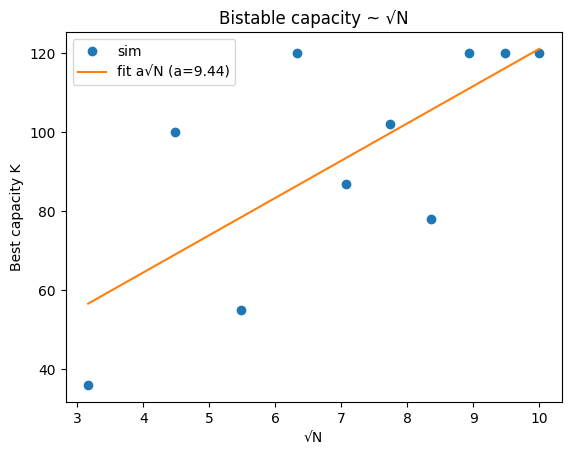

In [2]:

Ns = np.arange(10, 110, 10)
p_vals = np.linspace(0.05, 0.25, 5)
q_vals = np.linspace(0.05, 0.25, 5)
bestKs=[]
for N in Ns:
    K, p_opt, q_opt = gam.best_capacity_single(
        N, 'bistable', p_vals, q_vals,
        reps_per_assoc=8, max_K=120, threshold=0.3)[0:3]
    bestKs.append(K)
coeff = np.polyfit(np.sqrt(Ns), bestKs, 1)
plt.plot(np.sqrt(Ns), bestKs, 'o', label='sim')
plt.plot(np.sqrt(Ns), np.poly1d(coeff)(np.sqrt(Ns)), label=f'fit a√N (a={coeff[0]:.2f})')
plt.xlabel('√N'); plt.ylabel('Best capacity K'); plt.title('Bistable capacity ~ √N')
plt.legend(); plt.show()


## 2. Capacity vs ensemble size L (Bi‑stable)

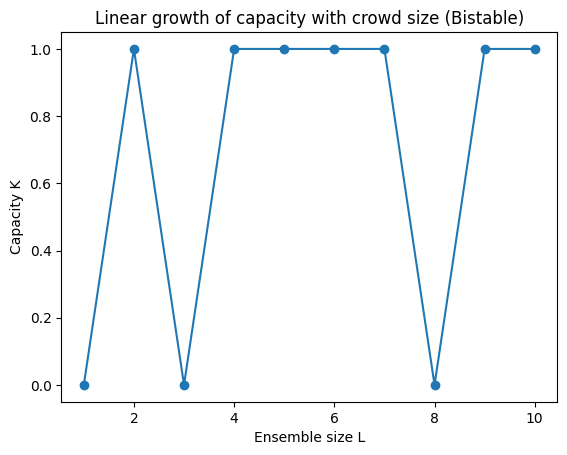

In [3]:

N=20
p_opt=0.15; q_opt=0.1
Ls = np.arange(1,11)
Ks=[]
for L in Ls:
    Ks.append(gam.capacity_crowd(N,L,'bistable',p_opt,q_opt,
                                 reps_per_assoc=8,max_K=120,threshold=0.3))
plt.plot(Ls, Ks, marker='o')
plt.xlabel('Ensemble size L'); plt.ylabel('Capacity K')
plt.title('Linear growth of capacity with crowd size (Bistable)')
plt.show()


## 3. Extinction & Latent Inhibition

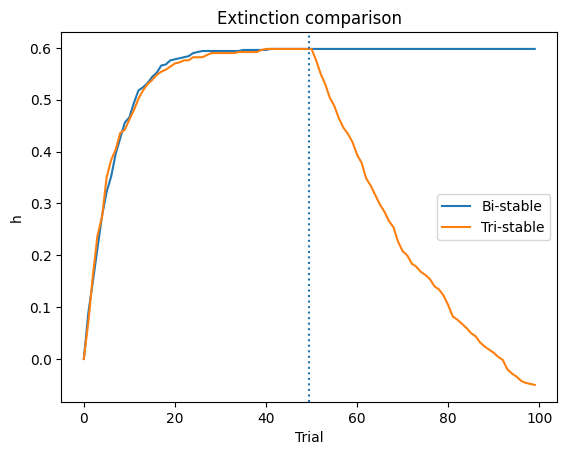

In [4]:

N=5
A=np.array([1,0,1,0,1])
patterns = np.vstack([A]*100)
us_ext   = np.r_[np.ones(50,int), np.zeros(50,int)]
h_bi = gam.simulate(patterns, us_ext, model='bistable', update_kwargs={'p_up':0.15,'q_down':0.1}, reps=100, seed=1).mean(0)
h_tri= gam.simulate(patterns, us_ext, model='tristable',
                    update_kwargs={'p_up':0.15,'q_unused2neg':0.2}, reps=100, seed=1).mean(0)
plt.plot(h_bi,label='Bi‑stable'); plt.plot(h_tri,label='Tri‑stable'); plt.axvline(49.5,ls=':')
plt.title('Extinction comparison'); plt.xlabel('Trial'); plt.ylabel('h'); plt.legend(); plt.show()


## 4. Tri‑stable capacity landscape

In [5]:

p_vals=np.linspace(0.05,0.25,5); q_vals=np.linspace(0.0,0.25,6)
Kbest,pb,qb,cap = gam.capacity(N=20,model='tristable',max_K=60,reps_per_assoc=8,threshold=0.3,
                               p_vals=p_vals,q_vals=q_vals,
                               other_kwargs={'p_active_decay_pos2zero':0.04})
plt.imshow(cap,origin='lower',extent=[p_vals[0],p_vals[-1],q_vals[0],q_vals[-1]],aspect='auto')
plt.colorbar(); plt.xlabel('p_up'); plt.ylabel('q_unused2neg')
plt.title('Tri‑stable capacity heatmap'); plt.show()


AttributeError: module 'gam_models' has no attribute 'capacity'

## 5. SNR vs K (Tri‑stable single vs crowd)

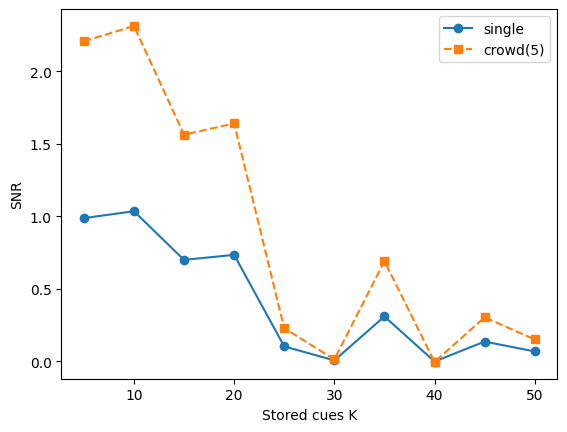

In [6]:

N=20; p=0.15; q=0.2
Ks=np.arange(5,55,5)
snr_single=[]; snr_crowd=[]
for K in Ks:
    snr_single.append(gam.snr_single(N,K,'tristable',p,q,
                                     extra_kwargs={'p_active_decay_pos2zero':0.04}))
    # crowd of 5 models majority vote; approximate SNR = sqrt(L)*single SNR
    snr_crowd.append(np.sqrt(5)*snr_single[-1])
plt.plot(Ks,snr_single,'o-',label='single'); plt.plot(Ks,snr_crowd,'s--',label='crowd(5)')
plt.xlabel('Stored cues K'); plt.ylabel('SNR'); plt.legend(); plt.show()
